In [7]:
import sys
import os
# Append the library path to PYTHONPATH, so library can be imported.
sys.path.append(os.path.dirname(os.getcwd()))
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from library import common as cm
from library import plot

In [2]:
%run setup.py
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style='darkgrid')

In [3]:
print(f'Load PNL from:\n{res_dir}')

Load PNL from:
/Users/rufj/Desktop/Weiguan/Weiguan Data/OptionMetrics/Result/FREQ=2D_HALFMONEY=otm_MINM=0.8_MAXM=1.5_MINTAU=0_Permute=False_VIX=False_MISSING=replace_missing_WINDOW=180D_KickTmrZeroVolume=False/


In [8]:
dirs_dict = {
    'no hedge': f'{res_dir}Regression/No_Hedge/',
    'BS': f'{res_dir}Regression/BS_Benchmark/',
    'fixed_const': f'{res_dir}Regression/Fixed_Constants/',
    'Gamma_only': f'{res_dir}Regression/Gamma_only/',
    'Vega_only': f'{res_dir}Regression/Vega_only/',
    'Vanna_only': f'{res_dir}Regression/Vanna_only/',
    'Bias': f'{res_dir}Regression/Bias/',
    'Delta_only': f'{res_dir}Regression/Delta_only/',
    'Delta_Vega_Vanna': f'{res_dir}Regression/Delta_Vega_Vanna/',
    'Hull_White': f'{res_dir}Regression/Hull_White/',
    'Network/Delta_Vega': f'{res_dir}Network/Delta_Vega/'
}

In [5]:
painter = plot.Painter(dirs_dict)
painter.load_real_pnl()

/Users/rufj/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
%run Load_Clean_aux.py

We remove samples when the next trade is not available. 215930 samples (5.97%) are removed. We have 94.03% of original data left, yielding a size of 3401034.
We remove unreasonable implvol0. 2174 samples (0.06%) are removed. We have 93.97% of original data left, yielding a size of 3398860.
We remove samples that have time to maturity less than 0 day. 0 samples (0.00%) are removed. We have 93.97% of original data left, yielding a size of 3398860.
We remove in-the-money samples. 694193 samples (20.42%) are removed. We have 74.78% of original data left, yielding a size of 2704667.
We shrink moneyness range. 104556 samples (3.87%) are removed. We have 71.89% of original data left, yielding a size of 2600111.


#### Plot confidence interval

Text(0, 0.5, 'Coefficient')

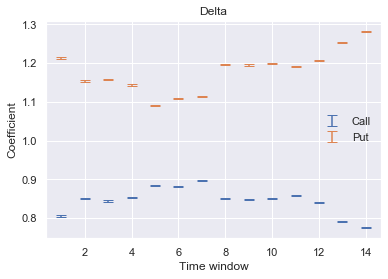

In [10]:
painter.plot_coef_err('Delta_only', {'Call': '0', 'Put': '1'}, 'delta_bs')
plt.title('Delta')
plt.xlabel('Time window')
plt.ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

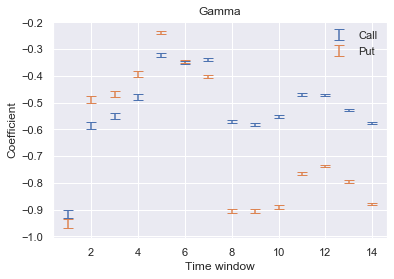

In [11]:
painter.plot_coef_err('Gamma_only', {'Call': '0', 'Put': '1'}, 'gamma_n')
plt.title('Gamma')
plt.xlabel('Time window')
plt.ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

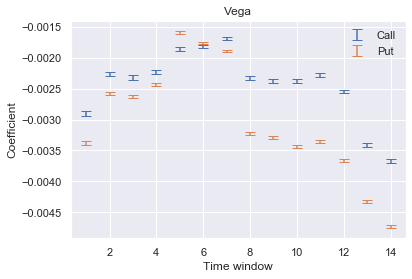

In [12]:
painter.plot_coef_err('Vega_only', {'Call': '0', 'Put': '1'}, 'vega_n')
plt.title('Vega')
plt.xlabel('Time window')
plt.ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

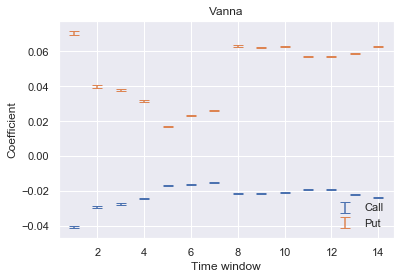

In [13]:
painter.plot_coef_err('Vanna_only', {'Call': '0', 'Put': '1'}, 'vanna_n')
plt.title('Vanna')
plt.xlabel('Time window')
plt.ylabel('Coefficient')

Text(0, 0.5, 'Coefficient')

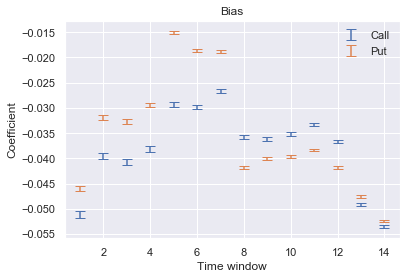

In [14]:
painter.plot_coef_err('Bias', {'Call': '0', 'Put': '1'}, 'bias')
plt.title('Bias')
plt.xlabel('Time window')
plt.ylabel('Coefficient')

Text(0, 0.5, 'Delta coefficient')

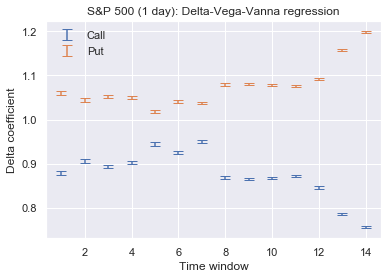

In [15]:
painter.plot_coef_err('Delta_Vega_Vanna', {'Call': '0', 'Put': '1'}, 'delta_bs')
plt.title('S&P 500 (1 day): Delta-Vega-Vanna regression')
plt.xlabel('Time window')
plt.ylabel('Delta coefficient')

Text(0, 0.5, 'Vega coefficient')

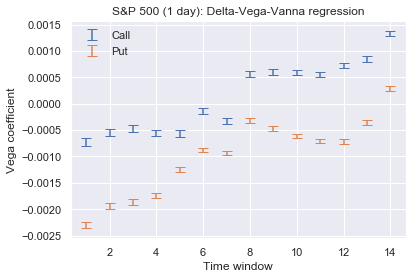

In [16]:
painter.plot_coef_err('Delta_Vega_Vanna', {'Call': '0', 'Put': '1'}, 'vega_n')
plt.title('S&P 500 (1 day): Delta-Vega-Vanna regression')
plt.xlabel('Time window')
plt.ylabel('Vega coefficient')

Text(0, 0.5, 'Vanna coefficient')

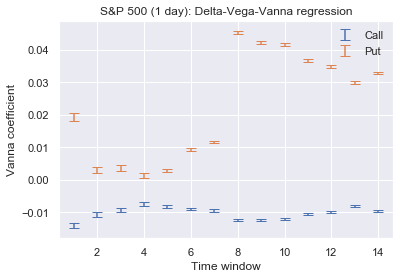

In [17]:
painter.plot_coef_err('Delta_Vega_Vanna', {'Call': '0', 'Put': '1'}, 'vanna_n')
plt.title('S&P 500 (1 day): Delta-Vega-Vanna regression')
plt.xlabel('Time window')
plt.ylabel('Vanna coefficient')

#### Compare period-by-period PNL for all approaches

In [19]:
kws = [
    ('no hedge', 'Zero hedge', '>', -0.3, sns.color_palette()[4]), 
    ('BS', 'BS-Delta', 'o', -0.2, sns.color_palette()[0]), 
    ('Delta_Vega_Vanna', 'Delta-Vega-Vanna regression', 'x', -0.1, sns.color_palette()[1]), 
    ('Hull_White', 'Hull-White regression', 'v', 0.1, sns.color_palette()[2]), 
    ('Network/Delta_Vega', r'ANN $(\Delta_{\rm BS};\, \mathcal{V}_{\rm BS};\, \tau)$', '^', 0.2, sns.color_palette()[3]),
      ]

In [20]:
ins = cm.LocalInspector()
ins.plug_existing(painter.pnl)

err = ins.compare_period()
length = err.shape[0]

(0.0005, 1.0)

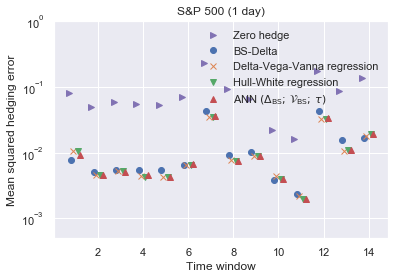

In [21]:
for col in kws:
    plt.plot(np.arange(1, length+1)+col[3], err[col[0]], marker=col[2], 
             linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel('Time window')
plt.ylabel('Mean squared hedging error')
plt.title('S&P 500 (1 day)')  # be careful!
plt.ylim((5e-4, 1e0))

(5.0, 30.0)

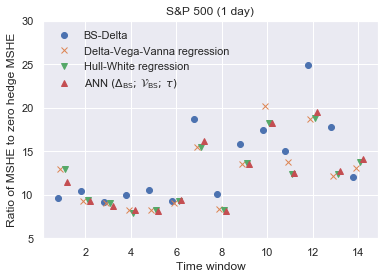

In [22]:
for col in kws[1:]:
    plt.plot(np.arange(1, length+1)+col[3], (err[col[0]]) / err['no hedge'] * 100,
             marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Ratio of MSHE to zero hedge MSHE')
plt.title('S&P 500 (1 day)') # Careful!!
plt.ylim([5., 30.])

(-5, 8)

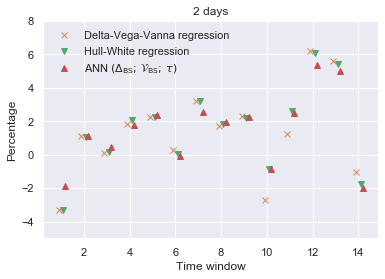

In [24]:
fig_period, ax_period = plt.subplots()
for col in kws[2:]:
    plt.plot(np.arange(1, length+1)+col[3], (err['BS'] - err[col[0]]) / err['no hedge'] * 100,
             marker=col[2], linewidth=0, label=col[1], c=col[4])
plt.ylabel('Percentage')
plt.xlabel('Time window')
plt.legend(frameon=False)
plt.title('2 days')
plt.ylim((-5, 8))

Text(0, 0.5, 'Mean squared PNL')

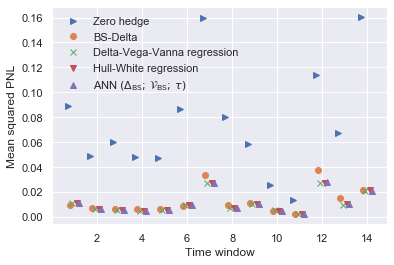

In [25]:
" For calls only "
err = ins.compare_period('call')
length = err.shape[0]

for col in kws:
    plt.plot(np.arange(1, length+1)+col[3], err[col[0]], marker=col[2], linewidth=0, label=col[1])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Mean squared PNL')

Text(0, 0.5, 'Mean squared PNL')

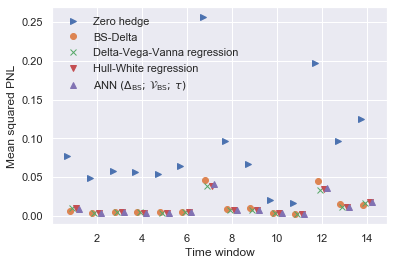

In [26]:
" For puts only "
err = ins.compare_period('put')
length = err.shape[0]

for col in kws:
    plt.plot(np.arange(1, length+1)+col[3], err[col[0]], marker=col[2], linewidth=0, label=col[1])
plt.legend(frameon=False)
plt.xlabel('Time window')
plt.ylabel('Mean squared PNL')

#### d1-d1 plot

Text(0.5, 0.98, 'Hedging ratios of ANN $(\\Delta_{\\rm BS};\\, \\mathcal{V}_{\\rm BS};\\, \\tau)$ vs. Delta-Vega-Vanna regression in S&P 500 (1 day)')

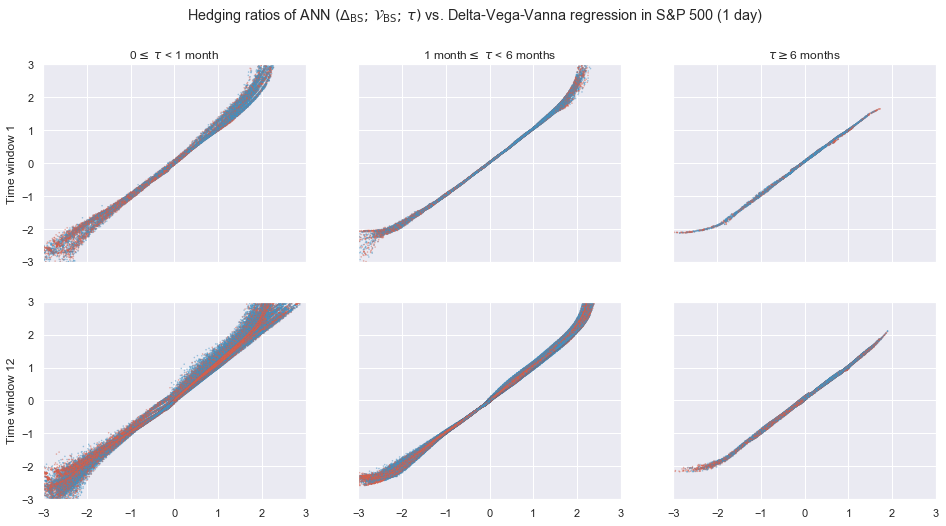

In [27]:
" d1 - d1"
groups = [(None, 0., 1/12., '0', '1 month'), (None, 1/12., 0.5, '1 month', '6 months'), 
          (None, 0.5, 5., '6 months', '5 years')]
feature = 'tau0'
# x1=['BS', 'Black-Scholes']
x1 = ['Delta_Vega_Vanna', 'Delta-Vega-Vanna regression']
x2=['Network/Delta_Vega', r'ANN $(\Delta_{\rm BS};\, \mathcal{V}_{\rm BS};\, \tau)$']
# x2=['Regression/Delta_Vega_Vanna', 'Delta-Vega-Vanna regression']
periods = [0, 11]
y = 'd1'

""" abs(PNL1) minus abs(PNL2) if true, then true color """
fig, axes = plt.subplots(ncols=len(groups), nrows=len(periods), figsize=(16, 8),
                        sharex=True, sharey=True)
axes1 = axes
axes = axes.flatten()
for j, period_id in enumerate(periods):
    axes1[j][0].set_ylabel(f'Time window {period_id+1}')
    for i, g in enumerate(groups):
        ax = axes[j*len(groups) + i]
        if g[0] != None:
            idx1 = painter.pnl[x1[0]]['cp_int'] == g[0]
        else:
            id_tmp = painter.pnl[x1[0]].index
            idx1 = pd.Series([True] * len(id_tmp), index=id_tmp)
        idx2 =  (painter.pnl[x1[0]][feature] >= g[1]) & (painter.pnl[x1[0]][feature] < g[2])
        idx3 = painter.pnl[x1[0]]['testperiod'] == period_id
        idx =  idx1 & idx2 & idx3
        painter.plot_relative_core(x1[0], x2[0], y, idx, ax)
        ax.set_xlim((-3, 3))
        ax.set_ylim((-3, 3))

for i, g in enumerate(groups[:2]):
    axes1[0][i].set_title(g[3] + r'$\leq$ $\tau$ < ' + g[4])
axes1[0][2].set_title(r'$\tau \geq$' + groups[2][3])
fig.suptitle(f'Hedging ratios of {x2[1]} vs. {x1[1]} in S&P 500 (1 day)')

#### PNL vs. sensitivities or features

In [28]:
# pnl = painter.pnl['Network/Delta_Vega']
model_name = 'Delta_Vega_Vanna'

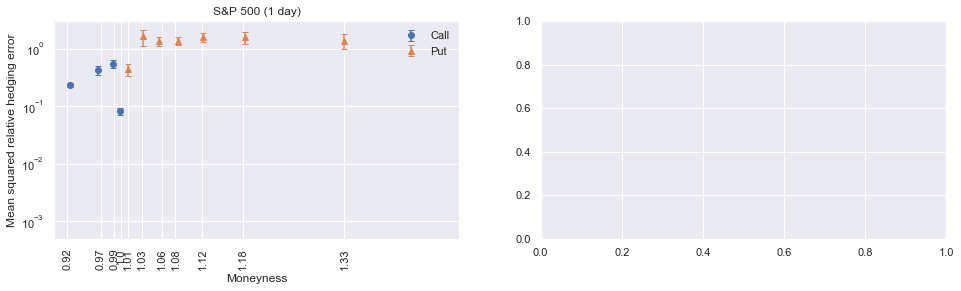

In [29]:
axes = painter.pnl_vs_feature_v2(df, model_name, 'M0', 1, sim_data=False, 
                         overall=True, normalized=True, qcut=True, ylog=True, 
                         xlims=(0.9, 1.5), ylims=(0.0005, 3))
axes[0].set_title('S&P 500 (1 day)')
axes[0].set_xlabel(r'Moneyness')
axes[0].set_ylabel(r'Mean squared relative hedging error')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].legend(frameon=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20c2f1d0>,
      dtype=object)

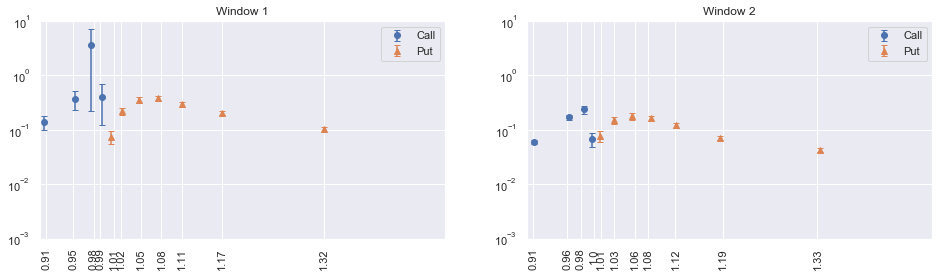

In [30]:
painter.pnl_vs_feature_v2(df, model_name, 'M0', 2, sim_data=False, normalized=True, 
                          qcut=True, xlims=(0.9, 1.5), ylog=True, ylims=(1e-3, 1e1))

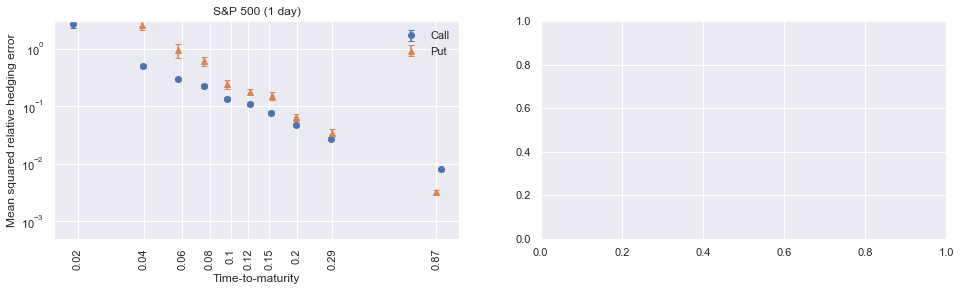

In [31]:
axes = painter.pnl_vs_feature_v2(df, model_name, 'tau0', 1, overall=True, sim_data=False,
                         normalized=True, qcut=True, xlog=True, ylog=True, ylims=(0.0005, 3))
axes[0].set_title('S&P 500 (1 day)')
axes[0].set_xlabel(r'Time-to-maturity')
axes[0].set_ylabel(r'Mean squared relative hedging error')
axes[0].set_xticks(axes[0].get_xticks()[:-1])
axes[0].legend(frameon=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a228194a8>,
      dtype=object)

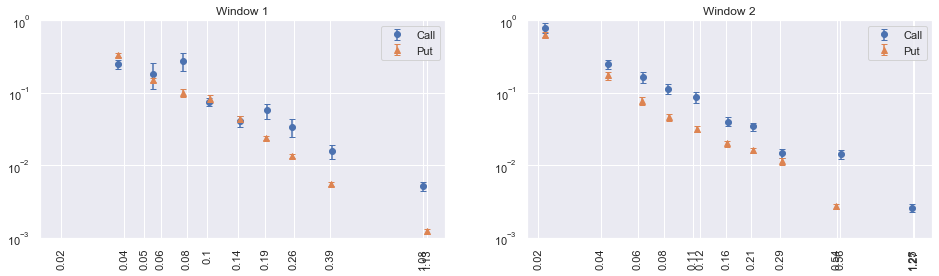

In [32]:
painter.pnl_vs_feature_v2(df, model_name, 'tau0', 2, sim_data=False,
                          normalized=True, qcut=True, xlog=True, ylog=True, ylims=(1e-3, 1e0))

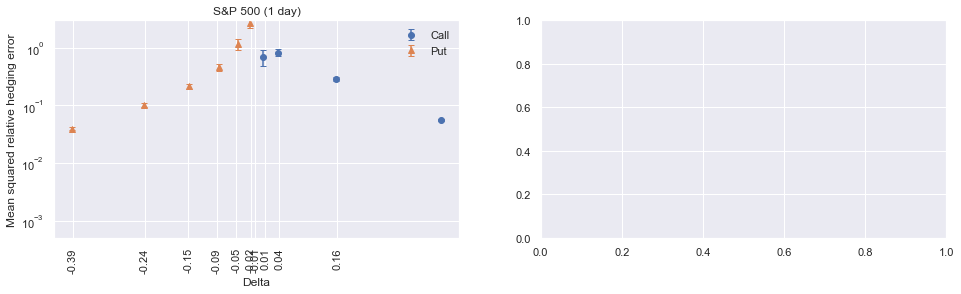

In [33]:
axes = painter.pnl_vs_feature_v2(df, model_name, 'delta_bs', 1, sim_data=False,
                                 overall=True, normalized=True, qcut=True, ylog=True, ylims=(0.0005, 3)) 
axes[0].set_title('S&P 500 (1 day)')
axes[0].set_xlabel(r'Delta')
axes[0].set_ylabel(r'Mean squared relative hedging error')
axes[0].set_xticks(axes[0].get_xticks()[:-1])
axes[0].legend(frameon=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23bd1048>,
      dtype=object)

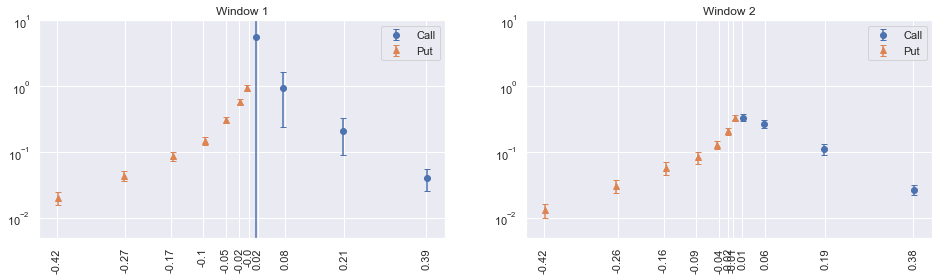

In [34]:
painter.pnl_vs_feature_v2(df, model_name, 'delta_bs', 2, sim_data=False, 
                          normalized=True, qcut=True, ylog=True, ylims=(5e-3, 1e1))

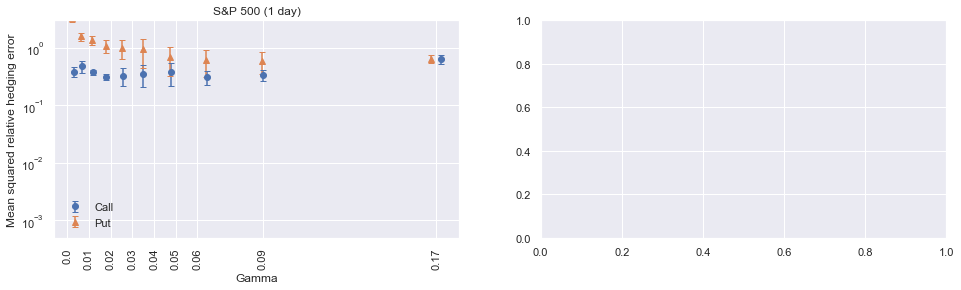

In [35]:
axes = painter.pnl_vs_feature_v2(df, model_name, 'gamma_n', 1, sim_data=False, overall=True, 
                  normalized=True, qcut=True, xlog=False, ylog=True, ylims=(0.0005, 3)) 
axes[0].set_title('S&P 500 (1 day)')
axes[0].set_xlabel(r'Gamma')
axes[0].set_ylabel(r'Mean squared relative hedging error')
axes[0].set_xticks(axes[0].get_xticks())
axes[0].legend(frameon=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2429d748>,
      dtype=object)

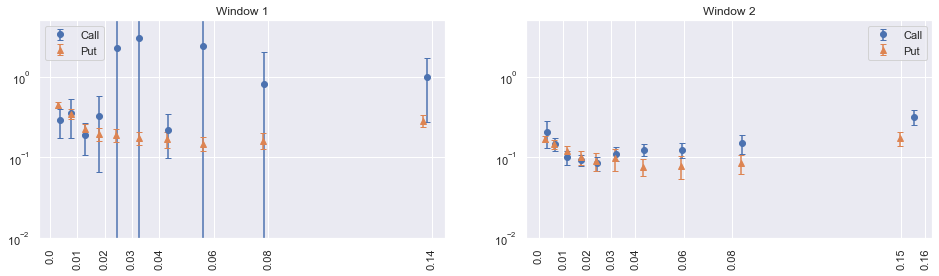

In [36]:
painter.pnl_vs_feature_v2(df, model_name, 'gamma_n', 2, sim_data=False, 
                          normalized=True, qcut=True, xlog=False, ylog=True, ylims=(1e-2, 5e0))

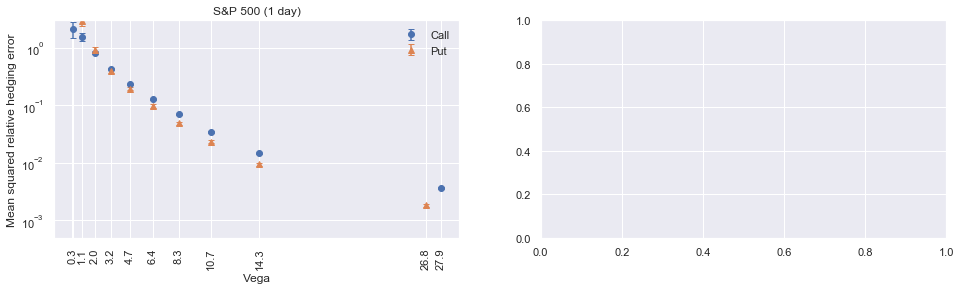

In [37]:
axes = painter.pnl_vs_feature_v2(df, model_name, 'vega_n', 1, sim_data=False, 
                                 normalized=True, overall=True, qcut=True, xlog=False, ylog=True, 
                                 ylims=(0.0005, 3))
ticks = axes[0].get_xticks()
tmp = [True] + (ticks[1:] - ticks[:-1] > 0.2).tolist()
a = [round(x, 1) if i is True else None for i, x in zip(tmp, ticks)]
axes[0].set_xticklabels(a)
axes[0].set_xlabel('Vega')
axes[0].set_ylabel('Mean squared relative hedging error')
axes[0].set_title('S&P 500 (1 day)')
axes[0].legend(frameon=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a25a8e390>,
      dtype=object)

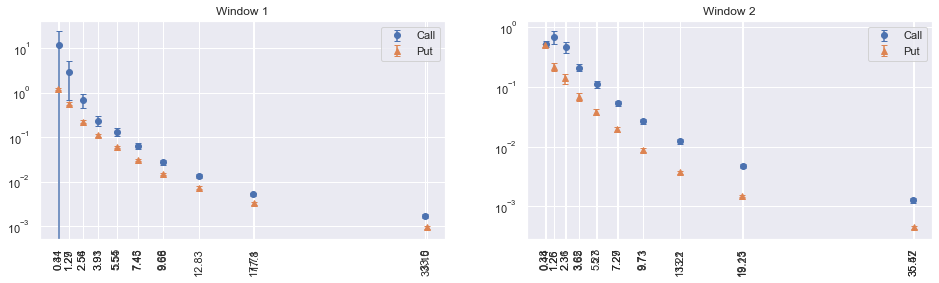

In [38]:
painter.pnl_vs_feature_v2(df, model_name, 'vega_n', 2, sim_data=False, 
                          normalized=True, qcut=True, xlog=False, ylog=True)